In [13]:
import shutil
import os

In [3]:
%cd ./datasets/1212-test/masks

/home/internet-lab/KITTI/Benson/SERVI/datasets/1212-test/masks


In [16]:
!pwd
for i in range(1, 91):
    # print(str(i).zfill(5))
    filename = str(i).zfill(5)+'.jpg'
    # print(filename)
    shutil.copyfile('00000.jpg', filename)
print(os.listdir('.'))

/home/internet-lab/KITTI/Benson/SERVI/datasets/1212-test/masks
['00049.jpg', '00038.jpg', '00026.jpg', '00023.jpg', '00053.jpg', '00058.jpg', '00009.jpg', '00039.jpg', '00079.jpg', '00076.jpg', '00022.jpg', '00015.jpg', '00060.jpg', '00089.jpg', '00003.jpg', '00018.jpg', '00075.jpg', '00044.jpg', '00000.jpg', '00080.jpg', '00034.jpg', '00016.jpg', '00062.jpg', '00067.jpg', '00012.jpg', '00002.jpg', '00065.jpg', '00031.jpg', '00033.jpg', '00037.jpg', '00082.jpg', '00028.jpg', '00074.jpg', '00046.jpg', '00061.jpg', '00004.jpg', '00005.jpg', '00047.jpg', '00019.jpg', '00001.jpg', '00084.jpg', '00024.jpg', '00086.jpg', '00088.jpg', '00078.jpg', '00014.jpg', '00068.jpg', '00050.jpg', '00059.jpg', '00063.jpg', '00042.jpg', '00007.jpg', '00048.jpg', '00020.jpg', '00057.jpg', '00051.jpg', '00006.jpg', '00069.jpg', '00056.jpg', '00090.jpg', '00017.jpg', '00035.jpg', '00081.jpg', '00040.jpg', '00052.jpg', '00029.jpg', '00054.jpg', '00021.jpg', '00013.jpg', '00010.jpg', '00043.jpg', '00066.jpg', 

### calculate metrics

In [4]:
%cd /home/hscc/Benson/SERVI/results/1223-FTR-fix/1225-FTR-test/2023-12-25_youtubevos/

/home/hscc/Benson/SERVI/results/1223-FTR-fix/1225-FTR-test/2023-12-25_youtubevos
/home/hscc/Benson/SERVI/results/1223-FTR-fix/1225-FTR-test/2023-12-25_youtubevos


In [6]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print(files)

['RASE_onlyMask_False.csv', 'SAM_onlyMask_False.csv', 'MSE_onlyMask_False.csv', 'SSIM_onlyMask_False.csv', 'VIF_onlyMask_False.csv', 'SCC_onlyMask_False.csv', 'UQI_onlyMask_False.csv', 'RMSE_onlyMask_False.csv', 'PSNR_onlyMask_False.csv', 'LPIPS_onlyMask_False.csv', 'MSSSIM_onlyMask_False.csv', 'PSNRB_onlyMask_False.csv']


In [21]:
import csv
from statistics import mean
for file in files:
    if file.endswith('.csv'):
        with open(file) as csvfile:
            val = []
            rows = csv.reader(csvfile)
            try:
                for row in rows:
                    total = 0
                    for i in range(1, len(row)-1):
                        total += float(row[i])
                    val.append(total/(len(row)-2))
                print(file, ":", mean(val))
            except:
                continue
        

RASE_onlyMask_False.csv : nan
SAM_onlyMask_False.csv : 0.08745096305735577
MSE_onlyMask_False.csv : 142.73915934096527
SSIM_onlyMask_False.csv : 0.9331333315869575
VIF_onlyMask_False.csv : 0.7312691713061084
SCC_onlyMask_False.csv : 0.6857669902607405
UQI_onlyMask_False.csv : 0.9824717478812847
RMSE_onlyMask_False.csv : 10.663989283919438
PSNR_onlyMask_False.csv : 28.77752721867497
LPIPS_onlyMask_False.csv : 0.038705034318274996
PSNRB_onlyMask_False.csv : 28.516339435490732


In [70]:
# convert images to pickle
import pandas as pd
import os
from tqdm import tqdm
from PIL import Image
from skimage import feature
import numpy as np
# cols = ['JPEGImages', 'gray', 'edges', 'edges_3', 'edges_4', 'wireframes', 'filename']
cols = ['JPEGImages', 'gray', 'edges', 'edges_2', 'edges_3', 'wireframes', 'filename']
df = pd.DataFrame(columns=cols)
data_root = './datasets/YouTubeVOS'
split = 'train'
size = (432, 240)
cnt = 0
for folder in tqdm(sorted(os.listdir(os.path.join(data_root, split+'_all_frames', 'JPEGImages')))):
    df = pd.DataFrame(columns=cols)
    for img in sorted(os.listdir(os.path.join(data_root, split+'_all_frames', 'JPEGImages', folder))):
        img_path = os.path.join(data_root, split+'_all_frames', 'JPEGImages', folder, img)
        gray_path = os.path.join(data_root, split+'_all_frames', 'gray', folder, img)
        # edges_path = os.path.join(data_root, split+'_all_frames', 'edges', folder, img)
        # edges_3_path = os.path.join(data_root, split+'_all_frames', 'edges_3', folder, img)
        # edges_4_path = os.path.join(data_root, split+'_all_frames', 'edges_4', folder, img)
        wireframes_path = os.path.join(data_root, split+'_all_frames', 'wireframes', folder, img.replace('jpg', 'png'))

        # load img
        img_ = np.array(Image.open(img_path).resize((432, 240)))
        gray = np.array(Image.open(gray_path).resize((432, 240)))
        # edges = Image.open(edges_path)
        # edges = edges.resize(size, Image.BOX)
        # edges = np.array(edges)
        # edges = np.array(np.array(edges) > 50).astype(np.uint8)*255
        # edges = np.array(Image.open(edges_path))
        edges = feature.canny(gray, sigma=1).astype(np.uint8)*255
        # edges_3 = np.array(Image.open(edges_3_path).resize((432, 240)))
        # edges_4 = np.array(Image.open(edges_4_path).resize((432, 240)))
        edges_2 = feature.canny(gray, sigma=2).astype(np.uint8)*255
        edges_3 = feature.canny(gray, sigma=3).astype(np.uint8)*255
        wireframes = np.array(Image.open(wireframes_path).resize((432, 240)))

        # df.append([img, gray, edges, edges_3, edges_4, wireframes, img_path])
        # df.loc[len(df)] = [img_, gray, edges, edges_3, edges_4, wireframes, img]
        df.loc[len(df)] = [img_, gray, edges, edges_2, edges_3, wireframes, img]
    df.to_pickle(os.path.join(data_root, split+'_all_frames', 'pickle', folder+'.pkl'))
    cnt += 1
    if(cnt > 1):
        break


  0%|          | 1/3471 [00:08<8:32:12,  8.86s/it]


In [81]:
import os
import pandas as pd
path = './datasets/YouTubeVOS/train_all_frames/pickle'
files = sorted([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
# df = pd.read_pickle(os.path.join(path, files[0]))

In [82]:
idx = 1
df = pd.read_pickle(os.path.join(path, files[idx]))
print(files[idx])

0043f083b5.pkl


In [87]:
import numpy as np
print(df['filename'][0])
test = np.array(df['edges'].tolist())
test.shape
# test.dtype
# df['edeges'][0]

00000.jpg


(96, 240, 432)

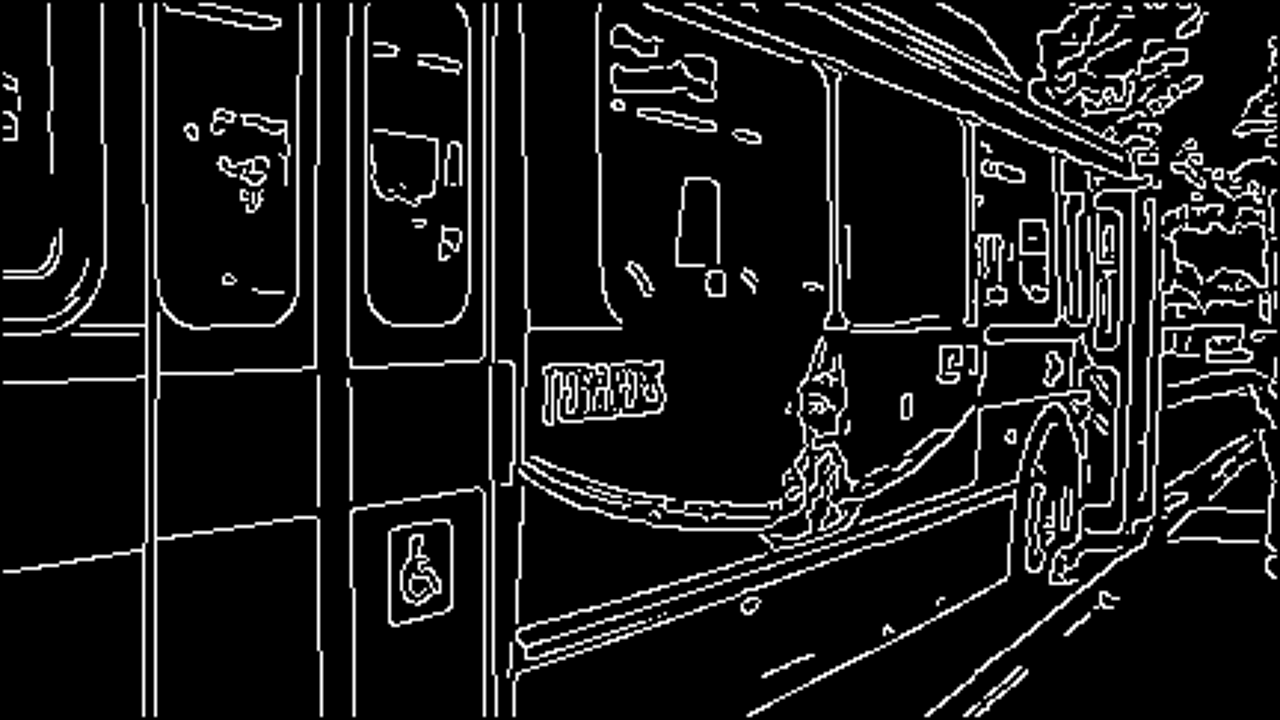

In [88]:
from PIL import Image
Image.fromarray(test[0]).resize((1280, 720))

In [15]:
test[[0, 2, 4]].shape

(3, 240, 432)